###Nama Anggota Kelompok :
1. Fadhila Asla Shana (22.12.2538)
2. Renita Tri Hastuti (22.12.2476)

In [1]:
! pip install matplotlib
! pip install seaborn

In [14]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import gdown
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [3]:
drive.mount('/content/drive')
df = pd.read_csv ('/content/drive/MyDrive/SEMESTER 6/Machine Learning 03/product_fashion.csv')

print("Dataset Information:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Mounted at /content/drive
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB
None

First 5 Rows:
   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Se

In [4]:
print("Informasi Dataset Sebelum Pembersihan:")
print(df.info())
print(df.head())

Informasi Dataset Sebelum Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB
None
   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breast

In [5]:
df = df[['Gender', 'Price (INR)']].dropna()


In [6]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates()

# Menghapus kolom NumImages jika ada
if 'NumImages' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['NumImages'])
else:
    df_cleaned = df_cleaned.copy()

# Memastikan total data duplikat setelah pembersihan (seharusnya 0)
total_duplicates_after = df_cleaned.duplicated().sum()
print("\nTotal data duplikat Setelah Pembersihan:", total_duplicates_after)

# Memastikan jumlah baris sebelum dan sesudah pembersihan
print("\nJumlah baris sebelum pembersihan:", len(df))
print("Jumlah baris setelah pembersihan:", len(df_cleaned))

# Jika jumlah baris tetap sama, beri peringatan
if len(df) == len(df_cleaned):
    print("\n[PERINGATAN] Tidak ada duplikasi yang dihapus karena dataset awal tidak memiliki duplikasi.")
else:
    print("\n[INFO] Duplikasi berhasil dihapus.")



Total data duplikat Setelah Pembersihan: 0

Jumlah baris sebelum pembersihan: 12491
Jumlah baris setelah pembersihan: 2427

[INFO] Duplikasi berhasil dihapus.


In [7]:
#Menampilkan informasi dataset setelah pembersihan
print("Informasi dataset Setelah Pembersihan:")
print(df_cleaned.info())

Informasi dataset Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 2427 entries, 0 to 12489
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       2427 non-null   object
 1   Price (INR)  2427 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.9+ KB
None


In [8]:
# Encoding Gender
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

# Fitur akhir
X = df[['Gender_encoded', 'Price (INR)']]

In [9]:
# Fitur akhir
X = df[['Gender_encoded', 'Price (INR)']]

# Normalisasi (optional tapi disarankan)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Clustering

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

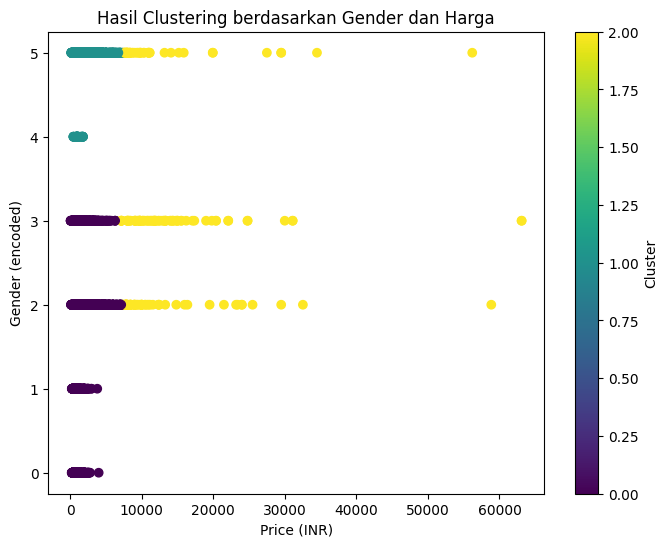

In [12]:
# Visualisasi hasil cluster
plt.figure(figsize=(8, 6))
plt.scatter(df['Price (INR)'], df['Gender_encoded'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Price (INR)')
plt.ylabel('Gender (encoded)')
plt.title('Hasil Clustering berdasarkan Gender dan Harga')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Menampilkan hasil evaluasi
if silhouette_avg > 0.5:
    print("Silhouette Score di atas 0.5, menunjukkan kualitas clustering yang baik.")
else:
    print("Silhouette Score kurang dari atau sama dengan 0.5, menunjukkan kualitas clustering yang kurang ideal.")

Silhouette Score: 0.6572537626799428
Silhouette Score di atas 0.5, menunjukkan kualitas clustering yang baik.


In [15]:
# Evaluasi Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Menampilkan hasil evaluasi
if db_index < 1.0:
    print("Davies-Bouldin Index mendekati 0, menunjukkan kualitas clustering yang baik.")
else:
    print("Davies-Bouldin Index lebih besar, menunjukkan kualitas clustering yang kurang ideal.")

Davies-Bouldin Index: 0.5692719945434451
Davies-Bouldin Index mendekati 0, menunjukkan kualitas clustering yang baik.
